In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv('../data/GSE72056_melanoma_single_cell_revised_v2.txt',sep='\t',index_col=0)

In [4]:
data=data.reset_index(drop=True)
# data=data.drop('Cell')
data=data.T
data.head()

,0,1,2,3,4,5,6,7,8,9,...,23679,23680,23681,23682,23683,23684,23685,23686,23687,23688
Cy72_CD45_H02_S758_comb,72.0,1.0,2.0,0.0,9.2172,0.0000,0.0,0.0,0.00000,0.0000,...,0.62667,0.0,0.0000,0.0,0.0000,7.6069,0.0000,0.0000,2.6638,0.0
CY58_1_CD45_B02_S974_comb,58.0,1.0,1.0,0.0,8.3745,0.0000,0.0,0.0,0.00000,0.0000,...,1.05450,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,6.9901,0.0
Cy71_CD45_D08_S524_comb,71.0,2.0,0.0,0.0,9.3130,2.1263,0.0,0.0,0.73812,0.0000,...,0.99639,0.0,2.7634,0.0,3.6782,0.0000,3.9871,3.8777,1.6126,0.0
Cy81_FNA_CD45_B01_S301_comb,81.0,2.0,0.0,0.0,7.8876,0.0000,0.0,0.0,0.00000,0.0000,...,0.23143,0.0,4.1937,0.0,0.0000,0.0000,5.2639,3.7660,4.8417,0.0
Cy80_II_CD45_B07_S883_comb,80.0,2.0,0.0,0.0,8.3291,0.0000,0.0,0.0,0.00000,3.7949,...,0.00000,0.0,2.5705,0.0,0.0000,0.0000,6.0824,1.7816,4.4607,0.0


In [6]:
## filter out genes that are either expressed in less than r% or at least (100-r)%
r=0.06
label=data.iloc[:,[0,1,2]]
data1=data.drop(columns=[0,1,2])
data2=data1.T[((data1==0).sum()/4645>r)&((data1==0).sum()/4645<1-r)].T

In [12]:
## split cell into malignat and non-malignant
malignant=data[data[1]==2]
nonmalignant=data[data[1]==1]
unresolved=data[data[1]==0]

In [7]:
# decomposition
tsne=TSNE(n_components=2, random_state=0,perplexity=50.0)
data_tsne=tsne.fit_transform(data2)
# to dataframe
data_tsne_df=pd.DataFrame(data_tsne)

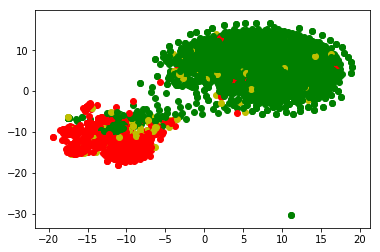

In [21]:
label_tsne_df=label.reset_index(drop=True).join(data_tsne_df,lsuffix='_x')
color_mal={
    1.0:'g',
    2.0:'r',
    0.0:'y'
}
for row in label_tsne_df.itertuples(index=True, name='Pandas'):
    plt.scatter(row[4],row[5],c=color_mal[row[2]])
plt.show()

# non-maligant cell 降维

In [39]:
tsne=TSNE(n_components=2, random_state=0,perplexity=20,early_exaggeration=15,n_iter_without_progress=100)
nonmalignant_tsne=tsne.fit_transform(nonmalignant)

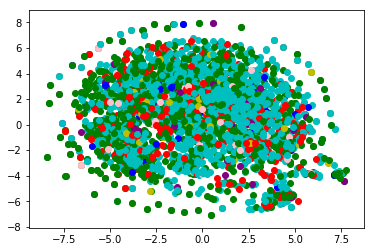

In [40]:
# to dataframe
nonmalignant_tsne_df=pd.DataFrame(nonmaligant_tsne)
nonmalignant_label_tsne=label.reset_index(drop=True).join(nonmalignant_tsne_df,lsuffix='_x')
color_nonmal={
    0.0:'c',
    1.0:'g',
    2.0:'r',
    3.0:'y',
    4.0:'b',
    5.0:'pink',
    6.0:'purple'
}
for row in nonmalignant_label_tsne.itertuples(index=True, name='Pandas'):
    plt.scatter(row[4],row[5],c=color_nonmal[row[3]])
plt.show()

# K-means 聚类

In [ ]:
num_clusters = 3
km_cluster = KMeans(n_clusters=num_clusters, max_iter=300, n_init=40,init='k-means++',n_jobs=-1)
#返回各自文本的所被分配到的类索引
result = km_cluster.fit_predict(tfidf_matrix)

# 层次聚类

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

k=3
 
model=AgglomerativeClustering(n_clusters=k,linkage='ward')
 
model.fit(data[fColumns]) # 训练模型
 
# 详细输出原始数据极其类别
 
r=pd.concat([data,pd.Series(model.labels_,index=data.index)],axis=1)
r.columns=list(data.columns)+['聚类类别']

# 谱聚类

In [ ]:
import time
from sklearn.cluster import SpectralClustering
from sklearn import metrics
    start = time.clock() 
    #X是训练集
    
    for index, gamma in enumerate((0.01,0.1,1)):
        for index, k in enumerate((3,4,5,6)):
            y_pred = SpectralClustering(n_clusters=k, gamma=gamma).fit_predict(X)
            print "Calinski-Harabasz Score with gamma=", gamma, "n_clusters=", k,"score:", metrics.calinski_harabaz_score(X, y_pred) 
                          
    end = time.clock()    
    print('finish all in %s' % str(end - start))

# 细胞类型统计

In [ ]:
label_tsne_df.head()

In [ ]:
label[1].value_counts().plot(kind='bar')

In [ ]:
label[2].value_counts().plot(kind='bar',)

# 聚类评价

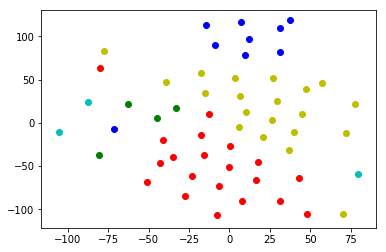

In [56]:
plt.scatter(*data_pca_tsne[data.cell.str.match(r'Zygote'),:].T,c='b')
plt.scatter(*data_pca_tsne[data.cell.str.match(r'Two-cell Embryo'),:].T,c='y')
plt.scatter(*data_pca_tsne[data.cell.str.match(r'Four-cell Embryo'),:].T,c='r')
plt.scatter(*data_pca_tsne[data.cell.str.match(r'Inner cell'),:].T,c='g')
plt.scatter(*data_pca_tsne[data.cell.str.match(r'Trophectoderm'),:].T,c='c')

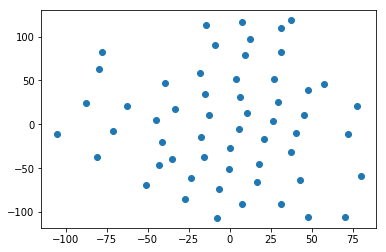

In [57]:
plt.scatter(*data_pca_tsne.T)

In [62]:
clf=KMeans(n_clusters=5)
clf=clf.fit(data_pca_tsne)
data_kmean=pd.DataFrame(data_pca_tsne)
data_kmean['label']=clf.labels_

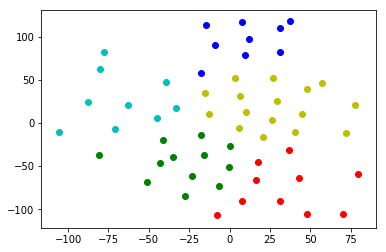

In [91]:
color=['r','b','g','c','y'];
for row in data_kmean.iterrows():
    plt.scatter(row[1][0],row[1][1],c=color[int(row[1]['label'])])

1.0